In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from random import random
import numpy as np

In [2]:
with open('../transit-inequality/080000/hex_1746.json') as f:
    own_times = json.load(f)
    
with open('./time.json') as f:
    hsl_times = json.load(f)
    
own = []
hsl = []
    
for i in range(len(own_times)):
    if own_times['hex_' + str(i)] > 0 and hsl_times['hex_' + str(i)] > 0:
        own.append(own_times['hex_' + str(i)])
        hsl.append(hsl_times['hex_' + str(i)])
        
df = pd.DataFrame(columns=['own', 'hsl'], index=list(range(len(own))))
df['own'] = own
df['hsl'] = hsl

df = df[(df['own'] < 8000) & (df['hsl'] < 8000) & (df['hsl'] > 0)]

df['diff'] = (df['hsl'] - df['own'])/df['hsl']

In [3]:
df

,own,hsl,diff
0,7727,4225,-0.828876
1,7311,4717,-0.549926
2,6063,5588,-0.085004
3,5554,5278,-0.052293
4,5138,4974,-0.032971
...,...,...,...
5085,4603,4752,0.031355
5087,4750,5092,0.067164
5088,4138,4599,0.100239
5089,4603,5043,0.087250


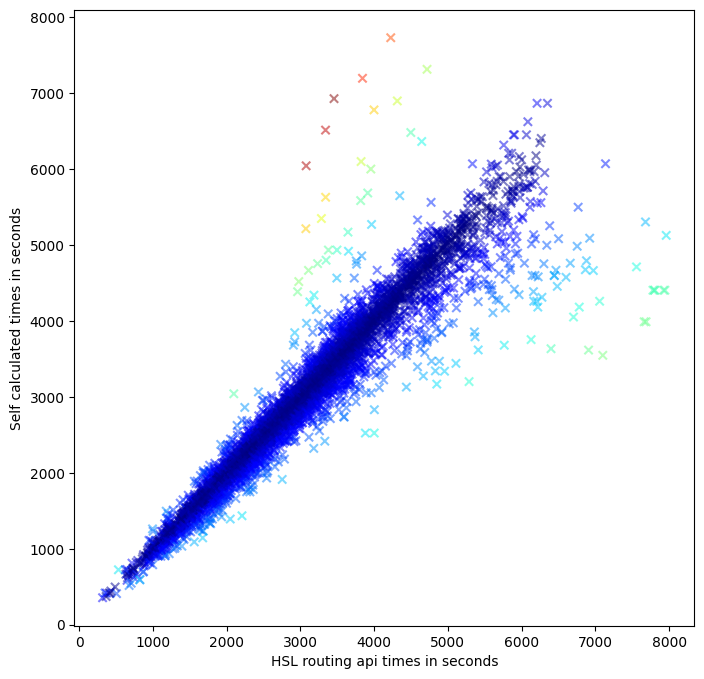

In [114]:
plt.figure(figsize=(8,8))
plt.scatter(x=df['hsl'], y=df['own'], marker='x', alpha=0.5, c=np.abs(df['diff']), cmap='jet')
plt.xlabel('HSL routing api times in seconds')
plt.ylabel('Self calculated times in seconds')
#plt.title('Comparrison of self calculated time and official routing times')
#plt.plot([9, 9], [0.9249, 1.0749], c='orange', label='median')
#plt.plot([np.mean(df['hsl'] - df['own']), np.mean(df['hsl'] - df['own'])], [0.925, 1.075], c='steelblue', label='mean')
plt.savefig('./validation_2.pdf', bbox_inches='tight')

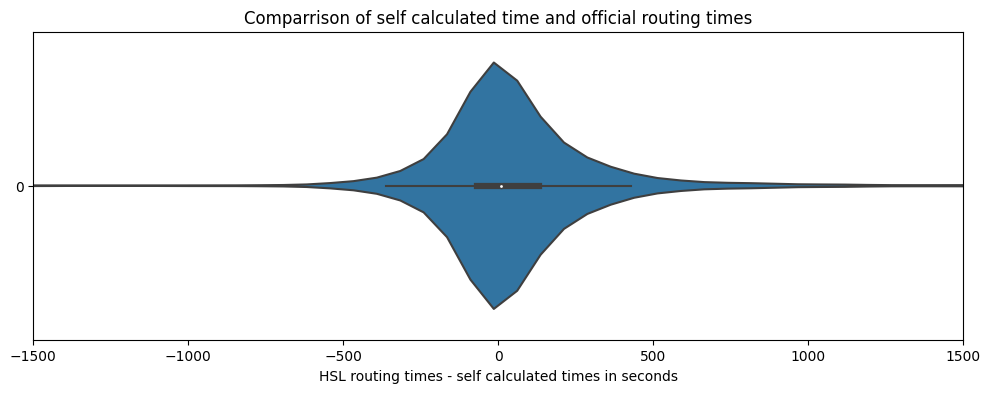

In [14]:
plt.figure(figsize=(12, 4))
sns.violinplot(df['hsl']-df['own'], orient='h')
plt.title('Comparrison of self calculated time and official routing times')
plt.xlim([-1500, 1500])
plt.xlabel('HSL routing times - self calculated times in seconds')
plt.savefig('./validation.pdf', bbox_inches='tight')

In [58]:
np.mean(df['hsl'] - df['own'])

54.243023946170595

In [81]:
b['medians'][0].get_data()

(array([9., 9.]), array([0.925, 1.075]))